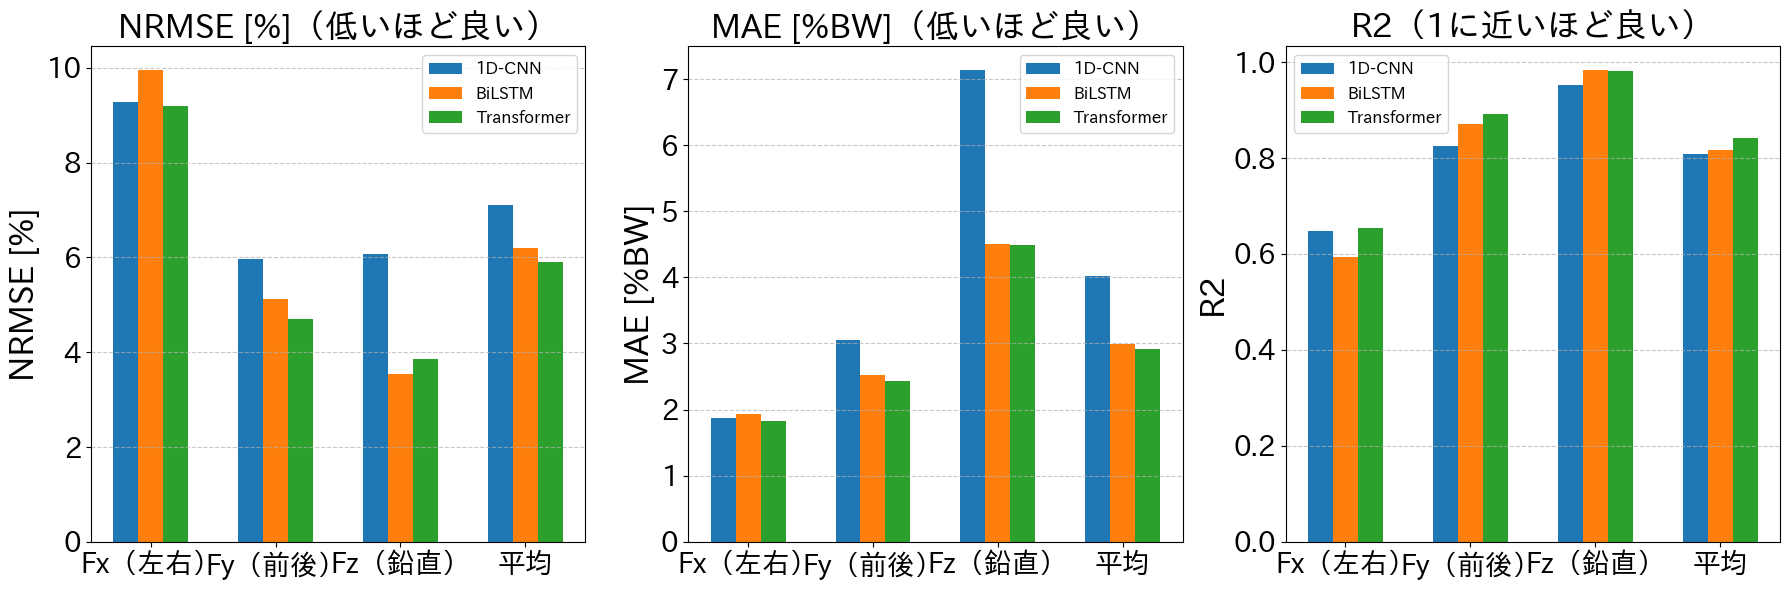

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import japanize_matplotlib  # 日本語表示用

# --- 設定 (config) ---
config = {
    # フォントサイズ設定
    'font_title': 24,    # タイトルの文字サイズ
    'font_label': 24,    # 軸ラベル（X軸、Y軸の説明）の文字サイズ
    'font_ticks': 20,    # 目盛り（軸の数値や項目名）の文字サイズ
    'font_legend': 12,   # 凡例の文字サイズ
    
    # グラフの全体設定
    'figsize': (18, 6),  # 画像全体のサイズ (横幅, 高さ)
    'bar_width': 0.2,   # 棒の幅
    
    # 色の設定
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c'] # 青、オレンジ、緑
}

# --- データの定義 ---
# NRMSE [%]
data_nrmse = {
    'Component': ['Fx（左右）', 'Fy（前後）', 'Fz（鉛直）', '平均'],
    '1D-CNN': [9.29, 5.96, 6.08, 7.11],
    'BiLSTM': [9.96, 5.12, 3.54, 6.21],
    'Transformer': [9.19, 4.71, 3.85, 5.91]
}
df_nrmse = pd.DataFrame(data_nrmse)

# MAE [%BW]
data_mae = {
    'Component': ['Fx（左右）', 'Fy（前後）', 'Fz（鉛直）', '平均'],
    '1D-CNN': [1.88, 3.05, 7.14, 4.02],
    'BiLSTM': [1.94, 2.53, 4.51, 2.99],
    'Transformer': [1.83, 2.44, 4.49, 2.92]
}
df_mae = pd.DataFrame(data_mae)

# R2 (決定係数)
data_r2 = {
    'Component': ['Fx（左右）', 'Fy（前後）', 'Fz（鉛直）', '平均'],
    '1D-CNN': [0.647, 0.825, 0.952, 0.808],
    'BiLSTM': [0.594, 0.871, 0.984, 0.816],
    'Transformer': [0.655, 0.891, 0.981, 0.842]
}
df_r2 = pd.DataFrame(data_r2)

# --- まとめて描画する関数 ---
def plot_combined_charts(config):
    # 1行3列のサブプロットを作成
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=config['figsize'])
    
    # ループ処理用の設定リスト
    charts_config = [
        (df_nrmse, 'NRMSE [%]（低いほど良い）', 'NRMSE [%]'),
        (df_mae, 'MAE [%BW]（低いほど良い）', 'MAE [%BW]'),
        (df_r2, 'R2（1に近いほど良い）', 'R2')
    ]
    
    width = config['bar_width']
    colors = config['colors']
    
    for ax, (df, title, ylabel) in zip(axes, charts_config):
        labels = df['Component']
        x = np.arange(len(labels))
        
        # 各モデルのバーを描画
        rects1 = ax.bar(x - width, df['1D-CNN'], width, label='1D-CNN', color=colors[0])
        rects2 = ax.bar(x, df['BiLSTM'], width, label='BiLSTM', color=colors[1])
        rects3 = ax.bar(x + width, df['Transformer'], width, label='Transformer', color=colors[2])
        
        # 各グラフの装飾 (configからフォントサイズを読み込み)
        ax.set_ylabel(ylabel, fontsize=config['font_label'])
        ax.set_title(title, fontsize=config['font_title'], fontweight='bold')
        
        # X軸の設定
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=config['font_ticks'])
        
        # Y軸の設定
        ax.tick_params(axis='y', labelsize=config['font_ticks'])

        # 凡例の設定
        ax.legend(fontsize=config['font_legend'])
        
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
    plt.tight_layout()
    plt.show()

# --- 実行 ---
plot_combined_charts(config)

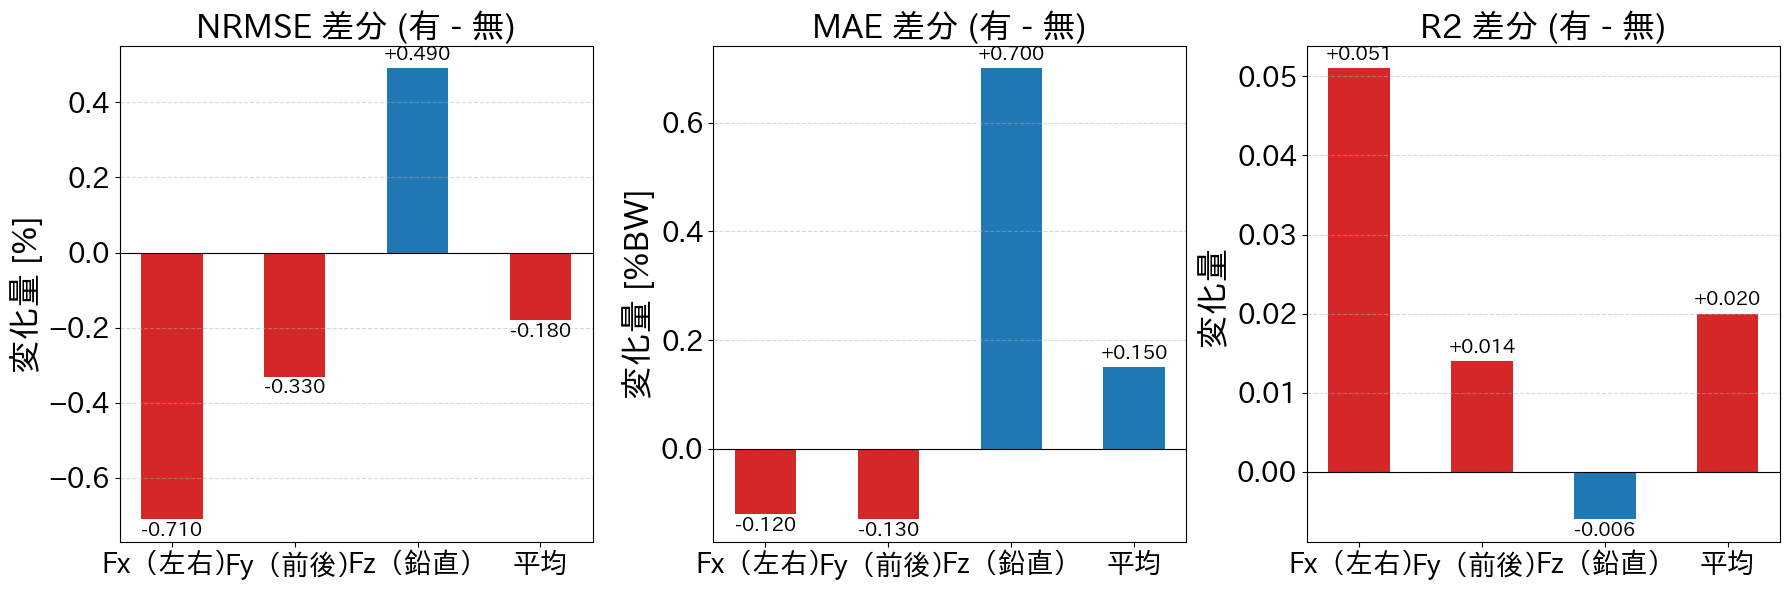

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import japanize_matplotlib

# --- 設定 (config) ---
config = {
    # フォントサイズ設定
    'font_title': 24,    # タイトルの文字サイズ
    'font_label': 24,    # 軸ラベル（X軸、Y軸の説明）の文字サイズ
    'font_ticks': 20,    # 目盛り（軸の数値や項目名）の文字サイズ
    'figsize': (18, 6),
    'bar_width': 0.5,
    # 色設定：今回は「良い結果」を赤、「悪い結果」を青にします
    'color_good': '#d62728',  # 赤（改善）
    'color_bad': '#1f77b4',   # 青（悪化）
}

# --- データの定義 ---
components = ['Fx（左右）', 'Fy（前後）', 'Fz（鉛直）', '平均']

# データ入力 (無, 有 の順)
# NRMSE [%]
nrmse_no = np.array([9.19, 4.71, 3.85, 5.91])
nrmse_yes = np.array([8.48, 4.38, 4.34, 5.73])

# MAE [%BW]
mae_no = np.array([1.83, 2.44, 4.49, 2.92])
mae_yes = np.array([1.71, 2.31, 5.19, 3.07])

# R2
r2_no = np.array([0.655, 0.891, 0.981, 0.842])
r2_yes = np.array([0.706, 0.905, 0.975, 0.862])

# 差分の計算 (有 - 無)
diff_nrmse = nrmse_yes - nrmse_no
diff_mae = mae_yes - mae_no
diff_r2 = r2_yes - r2_no

# --- 描画関数 ---
def plot_diff_charts_red_good(config):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=config['figsize'])

    # 設定リスト: (データ, タイトル, 単位, 評価タイプ)
    # type: 'error' (誤差系: 下がると赤) or 'score' (スコア系: 上がると赤)
    charts_config = [
        (diff_nrmse, 'NRMSE 差分 (有 - 無)', '[%]', 'error'),
        (diff_mae, 'MAE 差分 (有 - 無)', '[%BW]', 'error'),
        (diff_r2, 'R2 差分 (有 - 無)', '', 'score')
    ]

    for ax, (data, title, unit, metric_type) in zip(axes, charts_config):
        x = np.arange(len(components))
        
        # 色分けロジック
        colors = []
        for val in data:
            if metric_type == 'error':
                # 誤差系 (NRMSE, MAE): マイナス（減少）なら「良い＝赤」
                if val < 0:
                    colors.append(config['color_good']) # 赤
                else:
                    colors.append(config['color_bad'])  # 青
            else:
                # スコア系 (R2): プラス（増加）なら「良い＝赤」
                if val > 0:
                    colors.append(config['color_good']) # 赤
                else:
                    colors.append(config['color_bad'])  # 青

        # 棒グラフ描画
        bars = ax.bar(x, data, width=config['bar_width'], color=colors)
        
        # 0ライン（基準線）
        ax.axhline(0, color='black', linewidth=0.8)

        # 装飾
        ax.set_title(title, fontsize=config['font_title'], fontweight='bold')
        ax.set_ylabel(f'変化量 {unit}', fontsize=config['font_label'])
        ax.set_xticks(x)
        ax.set_xticklabels(components, fontsize=config['font_ticks'])
        ax.tick_params(axis='y', labelsize=config['font_ticks'])
        
        # グリッド
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        # 数値ラベルの追加
        for bar, val in zip(bars, data):
            height = bar.get_height()
            offset = 3 if height >= 0 else -15
            ax.annotate(f'{val:+.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, offset),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    plt.show()

# --- 実行 ---
plot_diff_charts_red_good(config)

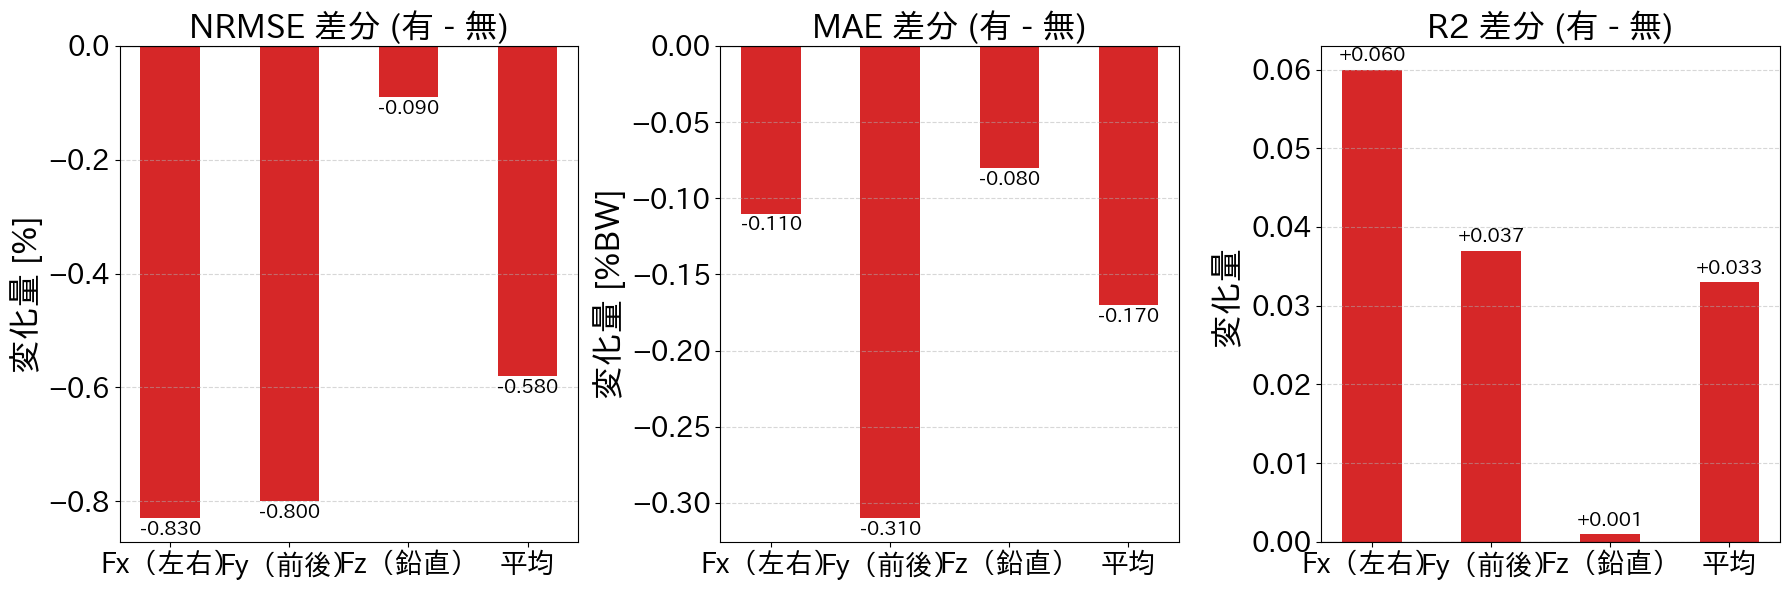

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import japanize_matplotlib

# --- 設定 (config) ---
config = {
    'font_title': 24,    # タイトルの文字サイズ
    'font_label': 24,    # 軸ラベル（X軸、Y軸の説明）の文字サイズ
    'font_ticks': 20,    # 目盛り（軸の数値や項目名）の文字サイズ
    'figsize': (18, 6),
    'bar_width': 0.5,
    # 色設定：「良い結果」を赤、「悪い結果」を青
    'color_good': '#d62728',  # 赤（改善）
    'color_bad': '#1f77b4',   # 青（悪化）
}

# --- データの定義 ---
components = ['Fx（左右）', 'Fy（前後）', 'Fz（鉛直）', '平均']

# データ入力 (無, 有 の順)
# NRMSE [%]
# 無: 9.31, 5.18, 4.43, 6.31
# 有: 8.48, 4.38, 4.34, 5.73
nrmse_no = np.array([9.31, 5.18, 4.43, 6.31])
nrmse_yes = np.array([8.48, 4.38, 4.34, 5.73])

# MAE [%BW]
# 無: 1.82, 2.62, 5.27, 3.24
# 有: 1.71, 2.31, 5.19, 3.07
mae_no = np.array([1.82, 2.62, 5.27, 3.24])
mae_yes = np.array([1.71, 2.31, 5.19, 3.07])

# R2
# 無: 0.646, 0.868, 0.974, 0.829
# 有: 0.706, 0.905, 0.975, 0.862
r2_no = np.array([0.646, 0.868, 0.974, 0.829])
r2_yes = np.array([0.706, 0.905, 0.975, 0.862])

# 差分の計算 (有 - 無)
diff_nrmse = nrmse_yes - nrmse_no
diff_mae = mae_yes - mae_no
diff_r2 = r2_yes - r2_no

# --- 描画関数 ---
def plot_diff_charts_red_good(config):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=config['figsize'])

    # 設定リスト: (データ, タイトル, 単位, 評価タイプ)
    charts_config = [
        (diff_nrmse, 'NRMSE 差分 (有 - 無)', '[%]', 'error'),
        (diff_mae, 'MAE 差分 (有 - 無)', '[%BW]', 'error'),
        (diff_r2, 'R2 差分 (有 - 無)', '', 'score')
    ]

    for ax, (data, title, unit, metric_type) in zip(axes, charts_config):
        x = np.arange(len(components))
        
        # 色分けロジック
        colors = []
        for val in data:
            if metric_type == 'error':
                # 誤差系 (NRMSE, MAE): マイナス（減少）なら「良い＝赤」
                if val < 0:
                    colors.append(config['color_good']) # 赤
                else:
                    colors.append(config['color_bad'])  # 青
            else:
                # スコア系 (R2): プラス（増加）なら「良い＝赤」
                if val > 0:
                    colors.append(config['color_good']) # 赤
                else:
                    colors.append(config['color_bad'])  # 青

        # 棒グラフ描画
        bars = ax.bar(x, data, width=config['bar_width'], color=colors)
        
        # 0ライン（基準線）
        ax.axhline(0, color='black', linewidth=0.8)

        # 装飾
        ax.set_title(title, fontsize=config['font_title'], fontweight='bold')
        ax.set_ylabel(f'変化量 {unit}', fontsize=config['font_label'])
        ax.set_xticks(x)
        ax.set_xticklabels(components, fontsize=config['font_ticks'])
        ax.tick_params(axis='y', labelsize=config['font_ticks'])
        
        # グリッド
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        # 数値ラベルの追加
        for bar, val in zip(bars, data):
            height = bar.get_height()
            # 表示位置調整
            offset = 3 if height >= 0 else -15
            ax.annotate(f'{val:+.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, offset),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    plt.show()

# --- 実行 ---
plot_diff_charts_red_good(config)